In [2]:
%matplotlib inline
from preamble import *

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

## Representing Data and Engineering Features

### Categorical Variables

\begin{align*}
\end{align*}

#### One-Hot-Encoding (Dummy variables)

The idea behind
dummy variables is to replace a categorical variable with one or more new features
that can have the values 0 and 1. The values 0 and 1 make sense in the formula for
linear binary classification (and for all other models in scikit-learn), and we can
represent any number of categories by introducing one new feature per category, as
described here.The idea behind
dummy variables is to replace a categorical variable with one or more new features
that can have the values 0 and 1. The values 0 and 1 make sense in the formula for
linear binary classification (and for all other models in scikit-learn), and we can
represent any number of categories by introducing one new feature per category, as
described here.


There are two ways to convert your data to a one-hot encoding of categorical vari‐
ables, using either pandas or scikit-learn. At the time of writing, using pandas is
slightly easier, so let’s go this route.There are two ways to convert your data to a one-hot encoding of categorical vari‐
ables, using either pandas or scikit-learn. At the time of writing, using pandas is
slightly easier, so let’s go this route.

In [4]:
import os
# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly in "names"
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(
    adult_path, header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# For illustration purposes, we only select some of the columns
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
# IPython.display allows nice output formatting within the Jupyter notebook
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


##### Checking string-encoded categorical data

In [5]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [6]:
print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [7]:
display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,...,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,...,0,0,1,0
1,50,13,0,0,...,0,0,1,0
2,38,40,0,0,...,0,0,1,0
3,53,40,0,0,...,0,0,1,0
4,28,40,0,0,...,0,0,1,0


In this case, we extract only the columns containing features—that is, all columns
from age to occupation_ Transport-moving. This range contains all the features but
not the target:

In [8]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Extract NumPy arrays
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44)  y.shape: (32561,)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.81


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Numbers Can Encode Categoricals

The get_dummies function in pandas treats all numbers as continuous and will not
create dummy variables for them. To get around this, you can either use scikitlearn’s OneHotEncoder, for which you can specify which variables are continuous
and which are discrete, or convert numeric columns in the DataFrame to strings. To
illustrate, let’s create a DataFrame object with two columns, one containing strings
and one containing integers:The get_dummies function in pandas treats all numbers as continuous and will not
create dummy variables for them. To get around this, you can either use scikitlearn’s OneHotEncoder, for which you can specify which variables are continuous
and which are discrete, or convert numeric columns in the DataFrame to strings. To
illustrate, let’s create a DataFrame object with two columns, one containing strings
and one containing integers:

In [10]:
# create a DataFrame with an integer feature and a categorical string feature
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
                        'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


Using get_dummies will only encode the string feature and will not change the integer
feature,

In [11]:
display(pd.get_dummies(demo_df))

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


If you want dummy variables to be created for the “Integer Feature” column, you can
explicitly list the columns you want to encode using the columns parameter. Then,
both features will be treated as categorical 

In [12]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
display(pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature']))

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


### OneHotEncoder and ColumnTransformer: Categorical Variables with scikit-learn

In [13]:
from sklearn.preprocessing import OneHotEncoder
# Setting sparse=False means OneHotEncode will return a numpy array, not a sparse matrix
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0.]]


In [14]:
print(ohe.get_feature_names())

['x0_0' 'x0_1' 'x0_2' 'x1_box' 'x1_fox' 'x1_socks']


In [15]:
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['age', 'hours-per-week']),
     ("onehot", OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])])

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# get all columns apart from income for the features
data_features = data.drop("income", axis=1)
# split dataframe and income
X_train, X_test, y_train, y_test = train_test_split(
    data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


In [18]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("Test score: {:.2f}".format(logreg.score(X_test_trans, y_test)))

Test score: 0.81


In [19]:
ct.named_transformers_.onehot

OneHotEncoder(sparse=False)

#### Convenient ColumnTransformer creation with ``make_columntransformer``

In [20]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    (['age', 'hours-per-week'], StandardScaler()),
    (['workclass', 'education', 'gender', 'occupation'], OneHotEncoder(sparse=False)))

### Binning, Discretization, Linear Models, and Trees

As you know, linear models can only model linear relationships, which are lines in
the case of a single feature. The decision tree can build a much more complex model
of the data. However, this is strongly dependent on the representation of the data.
One way to make linear models more powerful on continuous data is to use binning
(also known as discretization) of the feature to split it up into multiple features, as
described here.As you know, linear models can only model linear relationships, which are lines in
the case of a single feature. The decision tree can build a much more complex model
of the data. However, this is strongly dependent on the representation of the data.
One way to make linear models more powerful on continuous data is to use binning
(also known as discretization) of the feature to split it up into multiple features, as
described here.


We imagine a partition of the input range for the feature (in this case, the numbers
from –3 to 3) into a fixed number of bins—say, 10. A data point will then be repre‐
sented by which bin it falls into. To determine this, we first have to define the bins. In
this case, we’ll define 10 bins equally spaced between –3 and 3. We use the
np.linspace function for this, creating 11 entries, which will create 10 bins—they are
the spaces in between two consecutive boundaries:We imagine a partition of the input range for the feature (in this case, the numbers
from –3 to 3) into a fixed number of bins—say, 10. A data point will then be repre‐
sented by which bin it falls into. To determine this, we first have to define the bins. In
this case, we’ll define 10 bins equally spaced between –3 and 3. We use the
np.linspace function for this, creating 11 entries, which will create 10 bins—they are
the spaces in between two consecutive boundaries:

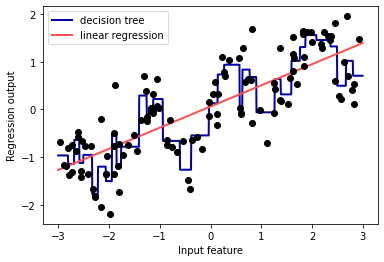

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [22]:
from sklearn.preprocessing import KBinsDiscretizer

In [23]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([-2.967, -2.378, -1.789, -1.2  , -0.612, -0.023,  0.566,  1.155,
         1.744,  2.333,  2.921])                                       ]


In [24]:
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [25]:
print(X[:10])
X_binned.toarray()[:10]

[[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]
 [-2.064]
 [-2.651]
 [ 2.197]
 [ 0.607]
 [ 1.248]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [26]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

Now we build a new linear regression model and a new decision tree model on the
one-hot-encoded data. The result is visualized in Figure 4-2, together with the bin
boundaries, shown as dotted black lines:

Text(0.5, 0, 'Input feature')

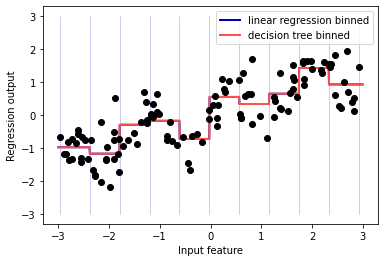

In [27]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

The dashed line and solid line are exactly on top of each other, meaning the linear
regression model and the decision tree make exactly the same predictions. For each
bin, they predict a constant value. As features are constant within each bin, any
model must predict the same value for all points within a bin. Comparing what the
models learned before binning the features and after, we see that the linear model
became much more flexible, because it now has a different value for each bin, while
the decision tree model got much less flexible. Binning features generally has no ben‐
eficial effect for tree-based models, as these models can learn to split up the data any‐
where. In a sense, that means decision trees can learn whatever binning is most useful
for predicting on this data. Additionally, decision trees look at multiple features at
once, while binning is usually done on a per-feature basis. 

### Interactions and Polynomials

In [28]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(120, 11)


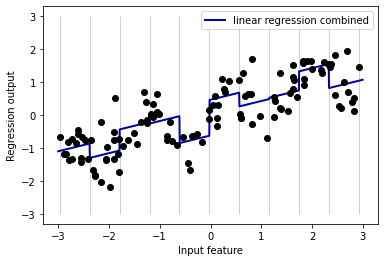

In [29]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')

Because the slope is shared across all bins, it doesn’t
seem to be very helpful. We would rather have a separate slope for each bin! We can
achieve this by adding an interaction or product feature that indicates which bin a
data point is in and where it lies on the x-axis. This feature is a product of the bin
indicator and the original feature. Let’s create this dataset:

In [30]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(120, 20)


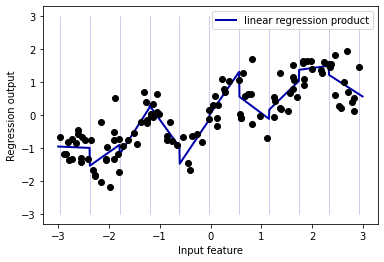

In [31]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

As you can see, now each bin has its own offset and slope in this model

Using binning is one way to expand a continuous feature. Another one is to use poly‐
nomials of the original features. For a given feature x, we might want to consider
x ** 2, x ** 3, x ** 4, and so on. This is implemented in PolynomialFeatures in
the preprocessing module:

In [32]:
from sklearn.preprocessing import PolynomialFeatures

# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [33]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (120, 10)


In [34]:
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]]
Entries of X_poly:
[[   -0.753     0.567    -0.427     0.321    -0.242     0.182    -0.137
      0.103    -0.078     0.058]
 [    2.704     7.313    19.777    53.482   144.632   391.125  1057.714
   2860.36   7735.232 20918.278]
 [    1.392     1.938     2.697     3.754     5.226     7.274    10.125
     14.094    19.618    27.307]
 [    0.592     0.35      0.207     0.123     0.073     0.043     0.025
      0.015     0.009     0.005]
 [   -2.064     4.26     -8.791    18.144   -37.448    77.289  -159.516
    329.222  -679.478  1402.367]]


In [35]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


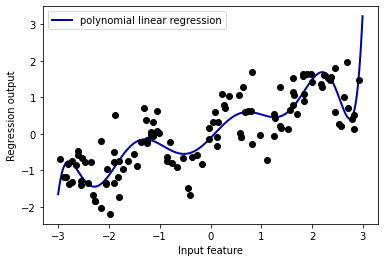

In [36]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

As you can see, polynomial features yield a very smooth fit on this one-dimensional
data. However, polynomials of high degree tend to behave in extreme ways on the
boundaries or in regions with little data.

As a comparison, here is a kernel SVM model learned on the original data, without
any transformation 

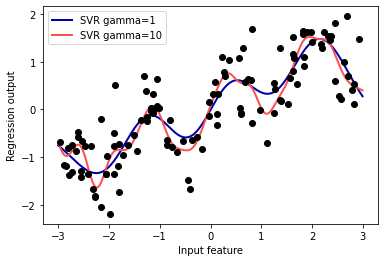

In [37]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

Using a more complex model, a kernel SVM, we are able to learn a similarly complex
prediction to the polynomial regression without an explicit transformation of the
features.

As a more realistic application of interactions and polynomials, let’s look again at the
Boston Housing dataset. We already used polynomial features on this dataset in
Chapter 2. Now let’s have a look at how these features were constructed, and at how
much the polynomial features help. First we load the data, and rescale it to be
between 0 and 1 using MinMaxScaler:

In [38]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=0)

# rescale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now, we extract polynomial features and interactions up to a degree of 2:

In [39]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [40]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


The first new feature is a constant feature, called "1" here. The next 13 features are
the original features (called "x0" to "x12"). Then follows the first feature squared
("x0^2") and combinations of the first and the other features.
Let’s compare the performance using Ridge on the data with and without interac‐
tions:

In [41]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
    ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(
    ridge.score(X_test_poly, y_test)))

Score without interactions: 0.621
Score with interactions: 0.753


Clearly, the interactions and polynomial features gave us a good boost in perfor‐
mance when using Ridge. When using a more complex model like a random forest,
the story is a bit different, though:

In [42]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
    rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score without interactions: 0.791
Score with interactions: 0.786


You can see that even without additional features, the random forest beats the
performance of Ridge. Adding interactions and polynomials actually decreases per‐
formance slightly

### Univariate Nonlinear Transformations

There are other transformations that often prove useful for transforming certain
features: in particular, applying mathematical functions like log, exp, or sin.There are other transformations that often prove useful for transforming certain
features: in particular, applying mathematical functions like log, exp, or sin.

While
tree-based models only care about the ordering of the features, linear models and
neural networks are very tied to the scale and distribution of each feature, and if there
is a nonlinear relation between the feature and the target, that becomes hard to model
—particularly in regression.While
tree-based models only care about the ordering of the features, linear models and
neural networks are very tied to the scale and distribution of each feature, and if there
is a nonlinear relation between the feature and the target, that becomes hard to model
—particularly in regression.


The functions log and exp can help by adjusting the rel‐
ative scales in the data so that they can be captured better by a linear model or neural
network. We saw an application of that in Chapter 2 with the memory price data. The
sin and cos functions can come in handy when dealing with data that encodes peri‐
odic patterns.The functions log and exp can help by adjusting the rel‐
ative scales in the data so that they can be captured better by a linear model or neural
network. We saw an application of that in Chapter 2 with the memory price data. The
sin and cos functions can come in handy when dealing with data that encodes peri‐
odic patterns.


Most models work best when each feature (and in regression also the target) is loosely
Gaussian distributed—that is, a histogram of each feature should have something
resembling the familiar “bell curve” shape. Using transformations like log and exp is
a hacky but simple and efficient way to achieve this.Most models work best when each feature (and in regression also the target) is loosely
Gaussian distributed—that is, a histogram of each feature should have something
resembling the familiar “bell curve” shape. Using transformations like log and exp is
a hacky but simple and efficient way to achieve this.

In [43]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [44]:
print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


The value 2 seems to be the most common, with 62 appearances (bincount always
starts at 0), and the counts for higher values fall quickly. However, there are some
very high values, like 134 appearing twice.

Text(0.5, 0, 'Value')

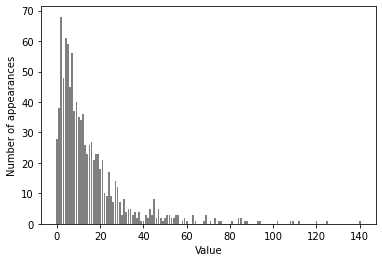

In [45]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

Features X[:, 1] and X[:, 2] have similar properties. This kind of distribution of
values (many small ones and a few very large ones) is very common in practice.1
However, it is something most linear models can’t handle very well. Let’s try to fit a
ridge regression to this model:

As you can see from the relatively low R
2
 score, Ridge was not able to really capture
the relationship between X and y. Applying a logarithmic transformation can help,
though. Because the value 0 appears in the data (and the logarithm is not defined at
0), we can’t actually just apply log, but we have to compute log(X + 1):

In [46]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


In [47]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'Value')

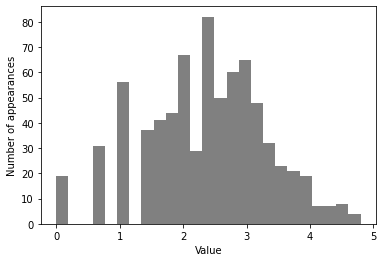

In [48]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

After the transformation, the distribution of the data is less asymmetrical and doesn’t
have very large outliers anymore (

In [49]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


### Automatic Feature Selection

 But how
can you know how good each feature is? There are three basic strategies: univariate
statistics, model-based selection, and iterative selection. We will discuss all three of
them in detail. All of these methods are supervised methods, meaning they need the
target for fitting the model. This means we need to split the data into training and test
sets, and fit the feature selection only on the training part of the data. But how
can you know how good each feature is? There are three basic strategies: univariate
statistics, model-based selection, and iterative selection. We will discuss all three of
them in detail. All of these methods are supervised methods, meaning they need the
target for fitting the model. This means we need to split the data into training and test
sets, and fit the feature selection only on the training part of the data.

#### Univariate statistics

In univariate statistics, we compute whether there is a statistically significant relation‐
ship between each feature and the target. Then the features that are related with the
highest confidence are selected. In the case of classification, this is also known as
analysis of variance (ANOVA).In univariate statistics, we compute whether there is a statistically significant relation‐
ship between each feature and the target. Then the features that are related with the
highest confidence are selected. In the case of classification, this is also known as
analysis of variance (ANOVA).


A key property of these tests is that they are univari‐
ate, meaning that they only consider each feature individually. Consequently, a fea‐
ture will be discarded if it is only informative when combined with another feature.
Univariate tests are often very fast to compute, and don’t require building a model.
On the other hand, they are completely independent of the model that you might
want to apply after the feature selection.A key property of these tests is that they are univari‐
ate, meaning that they only consider each feature individually. Consequently, a fea‐
ture will be discarded if it is only informative when combined with another feature.
Univariate tests are often very fast to compute, and don’t require building a model.
On the other hand, they are completely independent of the model that you might
want to apply after the feature selection.


To use univariate feature selection in scikit-learn, you need to choose a test, usu‐
ally either f_classif (the default) for classification or f_regression for regression,
and a method to discard features based on the p-values determined in the test. All
methods for discarding parameters use a threshold to discard all features with too
high a p-value (which means they are unlikely to be related to the target). The meth‐
ods differ in how they compute this threshold, with the simplest ones being SelectKB
est, which selects a fixed number k of features, and SelectPercentile, which selects
a fixed percentage of featuresTo use univariate feature selection in scikit-learn, you need to choose a test, usu‐
ally either f_classif (the default) for classification or f_regression for regression,
and a method to discard features based on the p-values determined in the test. All
methods for discarding parameters use a threshold to discard all features with too
high a p-value (which means they are unlikely to be related to the target). The meth‐
ods differ in how they compute this threshold, with the simplest ones being SelectKB
est, which selects a fixed number k of features, and SelectPercentile, which selects
a fixed percentage of features

In [50]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


We can find out which features have been selected using
the get_support method, which returns a Boolean mask of the selected features
(visualized in Figure 4-9):

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([], [])

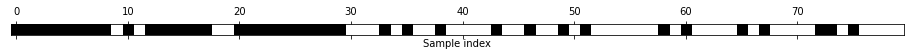

In [51]:
mask = select.get_support()
print(mask)
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

 Let’s compare the performance of
logistic regression on all features against the performance using only the selected
features:

In [52]:
from sklearn.linear_model import LogisticRegression

# transform test data
X_test_selected = select.transform(X_test)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(
    lr.score(X_test_selected, y_test)))

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Score with all features: 0.940
Score with only selected features: 0.940


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Model-based Feature Selection

The supervised model that is used for feature selection doesn’t need to be the same model that is used
for the final supervised modeling. The feature selection model needs to provide some
measure of importance for each feature, so that they can be ranked by this measure.

In contrast to univariate selection, model-based
selection considers all features at once, and so can capture interactions (if the model
can capture them).

In [53]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

In [54]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Again, we can have a look at the features that were selected

([], [])

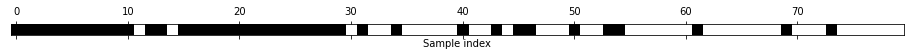

In [55]:
mask = select.get_support()
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

This time, all but two of the original features were selected. Because we specified to
select 40 features, some of the noise features are also selected. Let’s take a look at the
performance:

In [56]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=1000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.947


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Iterative feature selection

In univariate testing we used no model, while in model-based selection we used a sin‐
gle model to select features. In iterative feature selection, a series of models are built,
with varying numbers of features. There are two basic methods: starting with no fea‐
tures and adding features one by one until some stopping criterion is reached, or
starting with all features and removing features one by one until some stopping crite‐
rion is reached. Because a series of models are built, these methods are much more
computationally expensive than the methods we discussed previously. One particular
method of this kind is recursive feature elimination (RFE), which starts with all fea‐
tures, builds a model, and discards the least important feature according to the
model. Then a new model is built using all but the discarded feature, and so on until
only a prespecified number of features are left. 

([], [])

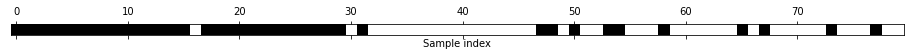

In [57]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

The feature selection got better compared to the univariate and model-based selec‐
tion, but one feature was still missed. Running this code also takes significantly longer
than that for the model-based selection, because a random forest model is trained 40
times, once for each feature that is dropped. 

In [58]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression(max_iter=1000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.954


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
print("Test score: {:.3f}".format(select.score(X_test, y_test)))

Test score: 0.951


### Utilizing Expert Knowledge

In [60]:
citibike = mglearn.datasets.load_citibike()

In [61]:
print("Citi Bike data:\n{}".format(citibike.head()))

Citi Bike data:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, 'Rentals')

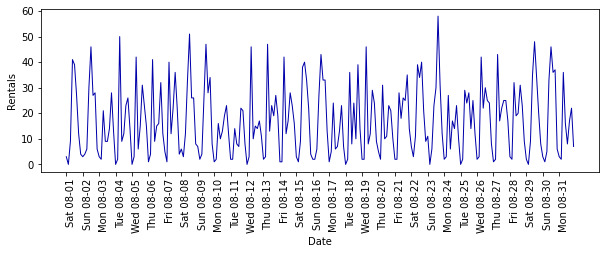

In [62]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
                       freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

When
evaluating a prediction task on a time series like this, we usually want to learn from
the past and predict for the future. This means when doing a split into a training and a
test set, we want to use all the data up to a certain date as the training set and all the
data past that date as the test set. This is how we would usually use time series predic‐
tion: given everything that we know about rentals in the past, what do we think will
happen tomorrow?  IMPORTANT

We will use the first 184 data points, corresponding to the first 23
days, as our training set, and the remaining 64 data points, corresponding to the
remaining 8 days, as our test set

The only feature that we are using in our prediction task is the date and time when a
particular number of rentals occurred. So, the input feature is the date and time—say,
2015-08-01 00:00:00—and the output is the number of rentals in the following
three hours (three in this case, according to our DataFrame).

In [63]:
# extract the target values (number of rentals)
y = citibike.values
# convert to POSIX time by dividing by 10**9
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

/var/folders/tv/c561t29x6496yycsl2cv_z9h0000gn/T/ipykernel_79034/2225363848.py:4: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9


In [64]:
# use the first 184 data points for training, the rest for testing
n_train = 184

# function to evaluate and plot a regressor on a given feature set
def eval_on_features(features, target, regressor):
    # split the given features into a training and a test set
    X_train, X_test = features[:n_train], features[n_train:]
    # also split the target array
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))

    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90,
               ha="left")

    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
             label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

We saw earlier that random forests require very little preprocessing of the data, which
makes this seem like a good model to start with. We use the POSIX time feature X and
pass a random forest regressor to our eval_on_features function. Figure 4-13 shows
the result

Test-set R^2: -0.04


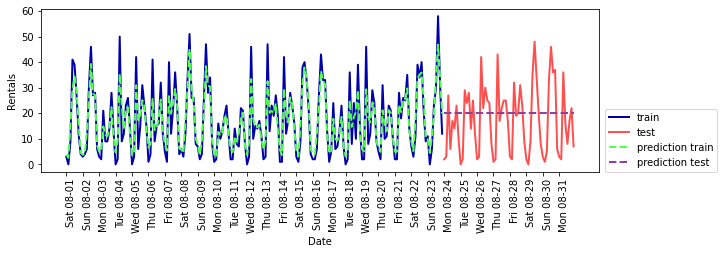

In [65]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

The predictions on the training set are quite good, as is usual for random forests.
However, for the test set, a constant line is predicted. The R
2
is –0.03, which means
that we learned nothing. What happened?
The problem lies in the combination of our feature and the random forest. The value
of the POSIX time feature for the test set is outside of the range of the feature values
in the training set: the points in the test set have timestamps that are later than all the
points in the training set. Trees, and therefore random forests, cannot extrapolate to
feature ranges outside the training set. The result is that the model simply predicts the
target value of the closest point in the training set—which is the last time it observed
any data.

Clearly we can do better than this. This is where our “expert knowledge” comes in.
From looking at the rental figures in the training data, two factors seem to be very
important: the time of day and the day of the week. So, let’s add these two features.
We can’t really learn anything from the POSIX time, so we drop that feature. First,
let’s use only the hour of the day. As Figure 4-14 shows, now the predictions have the
same pattern for each day of the week:

Test-set R^2: 0.60


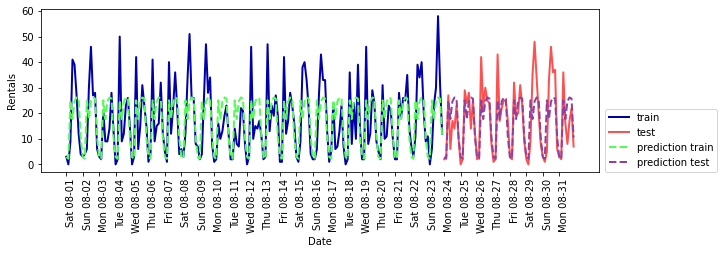

In [66]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

The R
2
 is already much better, but the predictions clearly miss the weekly pattern.
Now let’s also add the day of the week

Test-set R^2: 0.84


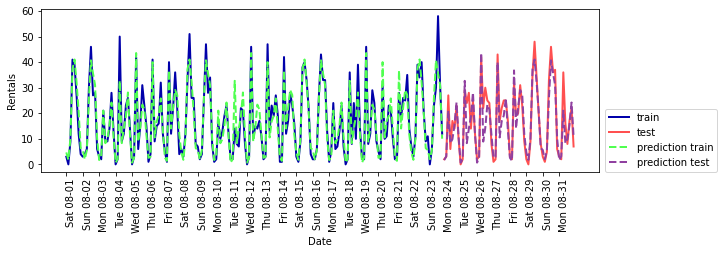

In [67]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

Now we have a model that captures the periodic behavior by considering the day of
week and time of day. It has an R
2
 of 0.84, and shows pretty good predictive perfor‐
mance. What this model likely is learning is the mean number of rentals for each
combination of weekday and time of day from the first 23 days of August. This
actually does not require a complex model like a random forest, so let’s try with a
simpler model, LinearRegression

Test-set R^2: 0.13


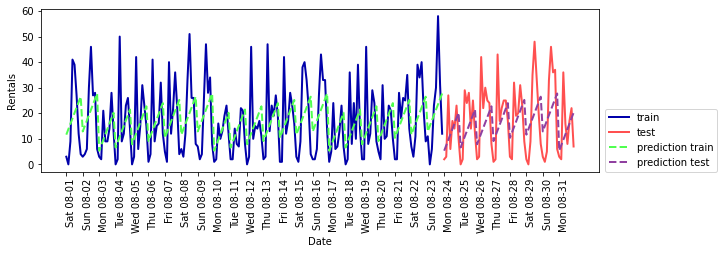

In [68]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

LinearRegression works much worse, and the periodic pattern looks odd. The rea‐
son for this is that we encoded day of week and time of day using integers, which are
interpreted as categorical variables. Therefore, the linear model can only learn a lin‐
ear function of the time of day—and it learned that later in the day, there are more
rentals. However, the patterns are much more complex than that. We can capture this
by interpreting the integers as categorical variables, by transforming them using One
HotEncoder

In [69]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

Test-set R^2: 0.62


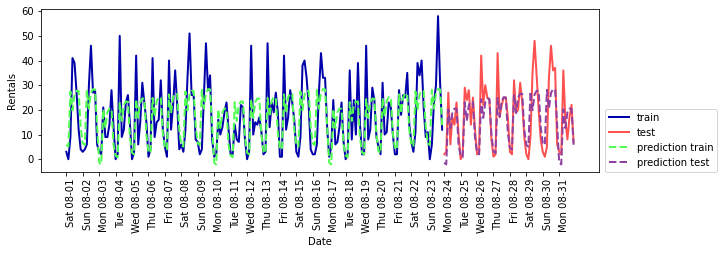

In [70]:
eval_on_features(X_hour_week_onehot, y, Ridge())

This gives us a much better match than the continuous feature encoding. Now the
linear model learns one coefficient for each day of the week, and one coefficient for
each time of the day. That means that the “time of day” pattern is shared over all days
of the week, though.
Using interaction features, we can allow the model to learn one coefficient for each
combination of day and time of day

Test-set R^2: 0.85


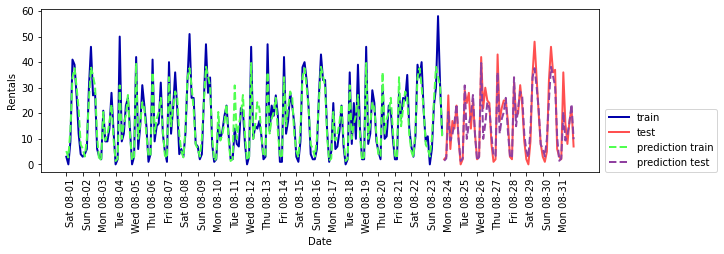

In [71]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

This transformation finally yields a model that performs similarly well to the random
forest. A big benefit of this model is that it is very clear what is learned: one coeffi‐
cient for each day and time. We can simply plot the coefficients learned by the model,
something that would not be possible for the random forest.

In [72]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features =  day + hour

Then we name all the interaction features extracted by PolynomialFeatures, using
the get_feature_names method, and keep only the features with nonzero coeffi‐
cients:

In [73]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Now we can visualize the coefficients learned by the linear model,

Text(0, 0.5, 'Feature magnitude')

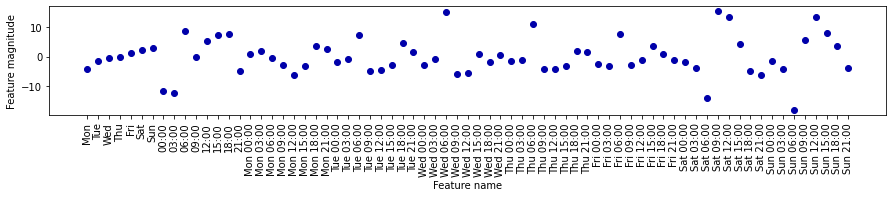

In [74]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature name")
plt.ylabel("Feature magnitude")

### Summary and Outlook

In particular, linear models might benefit greatly from generating
new features via binning and adding polynomials and interactions, while more com‐
plex, nonlinear models like random forests and SVMs might be able to learn more
complex tasks without explicitly expanding the feature space.